# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("../nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

          BPXDI1    BPXDI2
BPXDI1  1.000000  0.884722
BPXDI2  0.884722  1.000000
          BPXSY1    BPXSY2
BPXSY1  1.000000  0.962287
BPXSY2  0.962287  1.000000


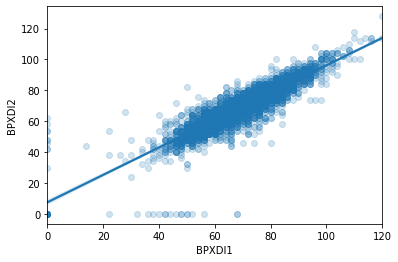

In [11]:
# enter your code here
sns.regplot(x="BPXDI1", y="BPXDI2", data=da, fit_reg=True, scatter_kws={"alpha": 0.2})
print(da.loc[:,["BPXDI1", "BPXDI2"]].dropna().corr())
print(da.loc[:,["BPXSY1", "BPXSY2"]].dropna().corr())

__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

<AxesSubplot:xlabel='BPXSY1', ylabel='BPXSY2'>

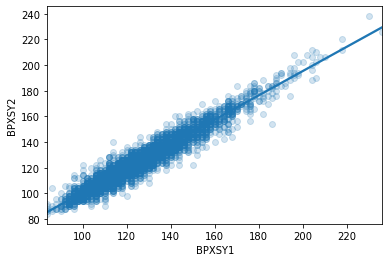

In [7]:
sns.regplot(x="BPXSY1", y="BPXSY2", data=da, fit_reg=True, scatter_kws={"alpha": 0.2})

The correlation is very similar. In both cases is very strong is almost linear

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

less correlated

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

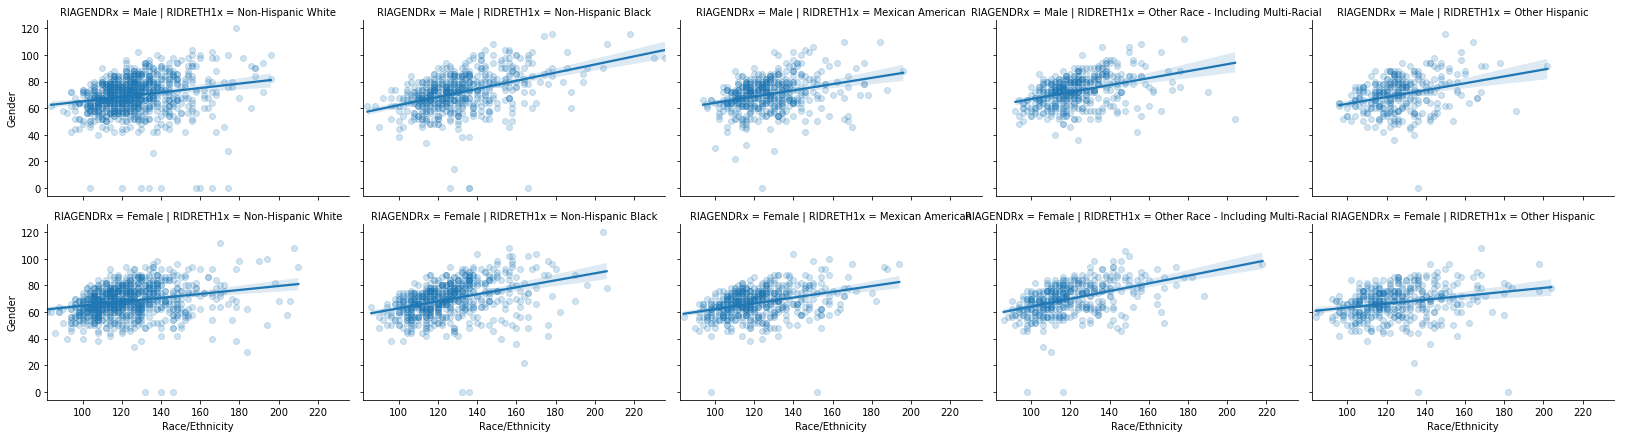

In [25]:
# insert your code here
da['RIAGENDRx'] = da['RIAGENDR'].replace({1: "Male", 2: "Female"}) 
da['RIDRETH1x'] = da['RIDRETH1'].replace({1: 'Mexican American', 2: 'Other Hispanic', 3: 'Non-Hispanic White', 4: 'Non-Hispanic Black', 5: 'Other Race - Including Multi-Racial'}) 

graph = sns.FacetGrid(da, row = 'RIAGENDRx', col = 'RIDRETH1x', height=3, aspect=1.5)
graph.map_dataframe(sns.regplot, x='BPXSY1', y='BPXDI1',fit_reg=True, scatter_kws={"alpha": 0.2})
graph.set_axis_labels('Race/Ethnicity','Gender')
graph.add_legend()

__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

More correlated in people of the same ethnicity thatn the ones that are multirracial or other-hispanic

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

da dataframe count:  5474
boolean_series dataframe count:  5735
boolean_series dataframe sum:  261
da dataframe count:  5735


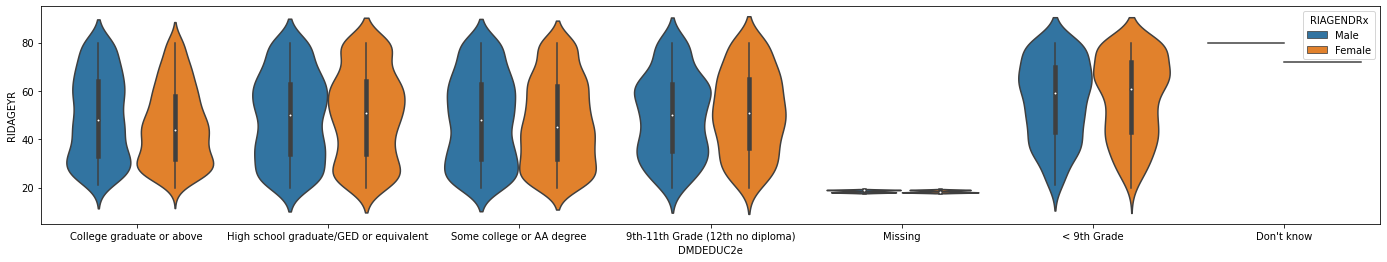

In [38]:
# insert your code here
da['DMDEDUC2e'] = da['DMDEDUC2'].replace({1: "< 9th Grade", 2: "9th-11th Grade (12th no diploma)", 3: "High school graduate/GED or equivalent", 4: "Some college or AA degree", 5: "College graduate or above",
                                   7:"Refused", 9:"Don't know"})
#Checking for NaN or None
print('da dataframe count: ',da['DMDEDUC2e'].count())

boolean_series = da['DMDEDUC2e'].isnull()
print('boolean_series dataframe count: ',boolean_series.count())
print('boolean_series dataframe sum: ',boolean_series.sum())

#Replacing NaN or None
da['DMDEDUC2e'].fillna('Missing', inplace = True)
print('da dataframe count: ',da['DMDEDUC2e'].count())

plt.figure(figsize=(24, 4))
sns.violinplot(x = da['DMDEDUC2e'], y = da['RIDAGEYR'], hue =  da['RIAGENDRx'] )
plt.show()
#sns.violinplot(x = da['RIAGENDRx'] , y = da['RIDAGEYR'])
#plt.show()
#sns.violinplot(x = da['DMDEDUC2e'] , y = da['RIDAGEYR'])
#plt.show()


__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

The older you are the less education level you have, the younger you are the more education you seem to have

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

<AxesSubplot:xlabel='agegrp', ylabel='BMXBMI'>

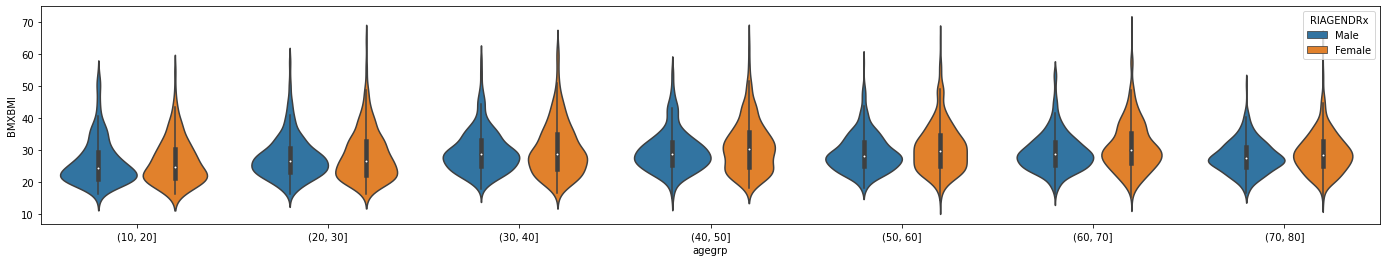

In [40]:
# insert your code here
# Create age strata based on these cut points
da['agegrp'] = pd.cut(da['RIDAGEYR'], [10, 20, 30, 40, 50, 60, 70, 80] ) 
plt.figure(figsize=(24, 4))
sns.violinplot(x = da['agegrp'], y = da['BMXBMI'], hue =  da['RIAGENDRx'] )

__Q5a.__ Comment on the trends in BMI across the demographic groups.

Females tend to have higher BMI in the middle age group and have their BMI increasing with age significantly more than males.
Males tend to have BMIs that are in the 20 to 40 range throughout their life

Both males and females have lower BMIs the younger they are

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [57]:
# insert your code here
#Creating proxy column and replacing null values
da['HIQ210x'] = da['HIQ210'].replace({1: "Yes", 2: "No", 9:"Missing"}) 
da['HIQ210x'].fillna('Missing', inplace = True)

#Checking null values are gone
boolean_series = da['HIQ210x'].isnull()
print('boolean_series dataframe count: ',boolean_series.count())
print('boolean_series dataframe sum: ',boolean_series.sum())

pd.set_option('display.float_format' , '{:.2f}%'.format)
da.groupby(['RIDRETH1x','HIQ210x']).size().unstack().apply(lambda x: x/x.sum(), axis=1)

boolean_series dataframe count:  5735
boolean_series dataframe sum:  0


HIQ210x,Missing,No,Yes
RIDRETH1x,,,
Mexican American,0.34%,0.57%,0.09%
Non-Hispanic Black,0.15%,0.75%,0.09%
Non-Hispanic White,0.10%,0.83%,0.06%
Other Hispanic,0.23%,0.67%,0.10%
Other Race - Including Multi-Racial,0.12%,0.81%,0.07%


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

Non-Hispanic White